In [1]:
import sys
if '/media/arthur/DATA/Code/projects/16_facial_recognition/face_recognition_project_simplon' not in sys.path:
    sys.path.insert(0, '/media/arthur/DATA/Code/projects/16_facial_recognition/face_recognition_project_simplon')
    
%load_ext autoreload
%autoreload 2

print("Python version:", sys.version)

Python version: 3.9.5 (default, Jun  4 2021, 12:28:51) 
[GCC 7.5.0]


# initial tests

In [2]:
from deepface import DeepFace
import pandas as pd
# pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_colwidth', 100)

In [3]:
df = DeepFace.find(img_path="../face_detection/test_images/test_chris.jpg", db_path="../face_detection/database")

There are  3  representations found in  representations_vgg_face.pkl
find function lasts  1.805595874786377  seconds


In [4]:
df

identity  \
0  ../face_detection/database/Chris_Hemsworth/chris_hemsworth.jpg   

   VGG-Face_cosine  
0         0.072737

In [5]:
# import sys
# import os
# for item in sys.path:
#     print(item)
# print(os.getcwd())

## list of model names

- 'VGG-Face'
- 'OpenFace'
- 'Facenet'
- 'Facenet512'
- 'DeepFace'
- 'DeepID'
- 'Dlib'
- 'ArcFace'
- 'Emotion'
- 'Age'
- 'Gender'
- 'Race'

## list of detector names

- 'opencv': OpenCvWrapper.py
- 'ssd': SsdWrapper.py
- 'dlib': DlibWrapper.py
- 'mtcnn': MtcnnWrapper.py
- 'retinaface': RetinaFaceWrapper.py

## tests functions.load_image

In [6]:
from deepface.commons import functions
# import cv2
import matplotlib.pyplot as plt

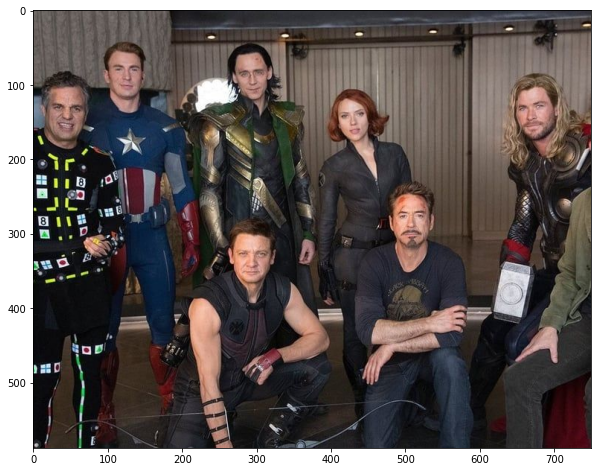

In [7]:
cv2_img = functions.load_image("../face_detection/test_images/test2.jpg")
plt.figure(figsize=(10,10))
plt.imshow(cv2_img[:, :, ::-1])

In [8]:
type(cv2_img), cv2_img.dtype

(numpy.ndarray, dtype('uint8'))

**functions.load_image**: 
- inputs: the absolute path to an image
- returns: the BGR (cv2 format) uint8 numpy array representing the image

## tests OpenCvWrapper.detect_faces

In [9]:
from deepface.detectors import OpenCvWrapper

In [10]:
detected_face, region = OpenCvWrapper.detect_face(OpenCvWrapper.build_model(), cv2_img, align=True)

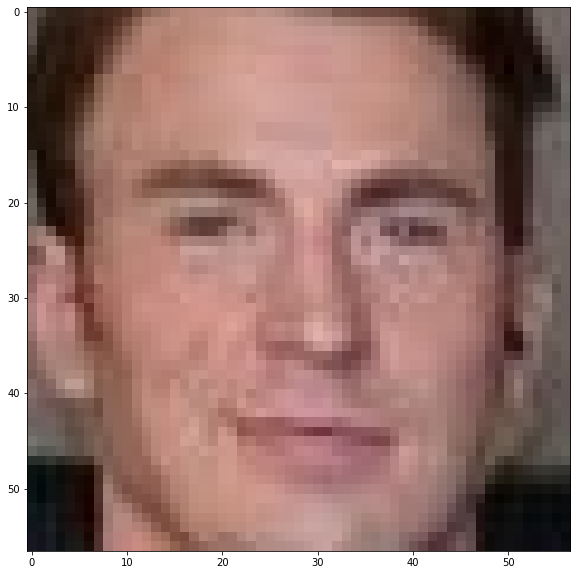

In [11]:
plt.figure(figsize=(10,10))
plt.imshow(detected_face[:, :, ::-1])

In [12]:
region # x, y (from top left of image), w, h

[96, 57, 57, 57]

**detectors.<>Wrapper**:
- input: built model, image array, align
- output: single face image array and region

gotta make the new function output a list of face images and regions

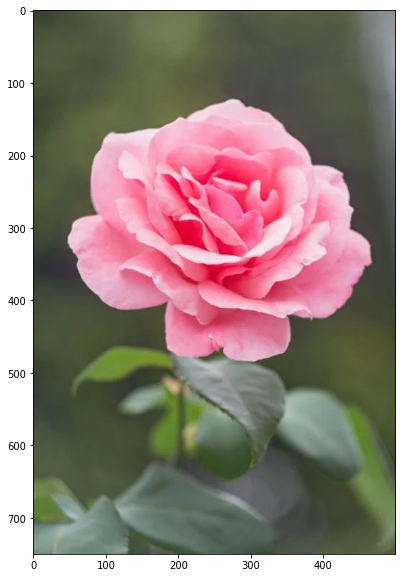

In [13]:
flower_img = functions.load_image("../face_detection/test_images/test_flower.jpg")
plt.figure(figsize=(10,10))
plt.imshow(flower_img[:, :, ::-1])

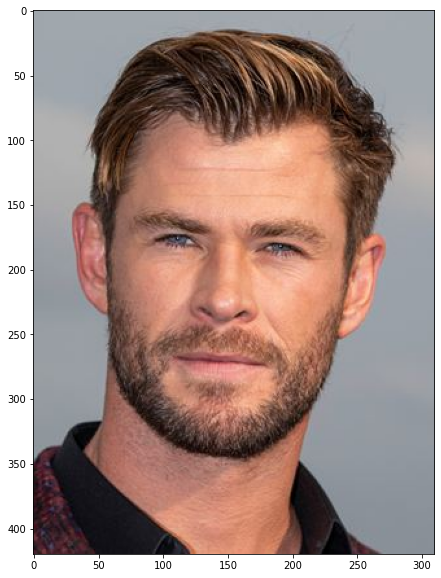

In [14]:
chris_img = functions.load_image("../face_detection/test_images/test_chris.jpg")
plt.figure(figsize=(10,10))
plt.imshow(chris_img[:, :, ::-1])

In [15]:
detected_faces_list, img_regions_list = OpenCvWrapper.detect_faces(OpenCvWrapper.build_model(), cv2_img, align=True)

In [16]:
len(img_regions_list)

7

In [ ]:
# for face_img in detected_faces_list:
#     plt.figure(figsize=(5,5))
#     plt.imshow(face_img[:, :, ::-1])
#     plt.show()

## tests functions.draw_boxes

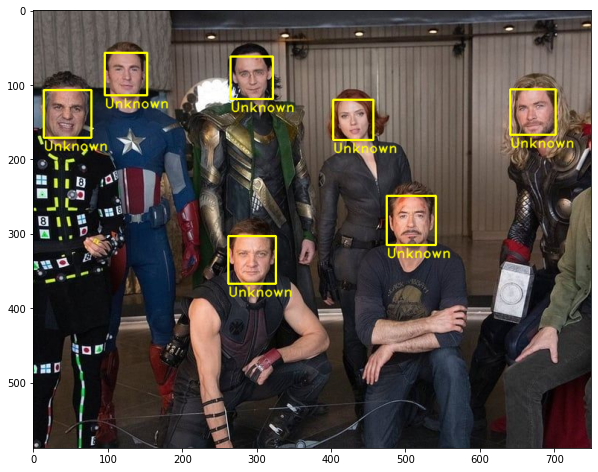

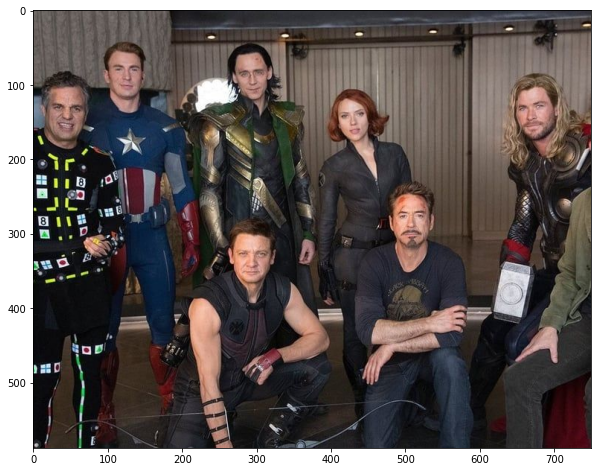

In [17]:
img_with_boxes = functions.draw_boxes(cv2_img, img_regions_list, color=(0,255,255))
plt.figure(figsize=(10,10))
plt.imshow(img_with_boxes[:, :, ::-1])
plt.show()
plt.figure(figsize=(10,10))
plt.imshow(cv2_img[:, :, ::-1])
plt.show()

## tests FaceDetector.detect_faces

In [18]:
from deepface.detectors import FaceDetector

In [19]:
detected_faces_images, img_regions_list = FaceDetector.detect_faces(FaceDetector.build_model('opencv'), 'opencv', cv2_img)

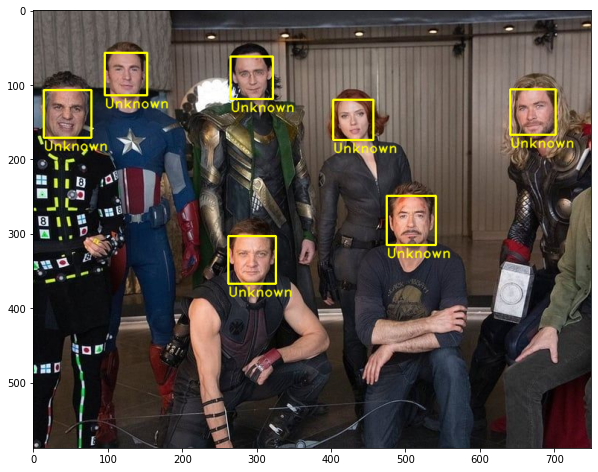

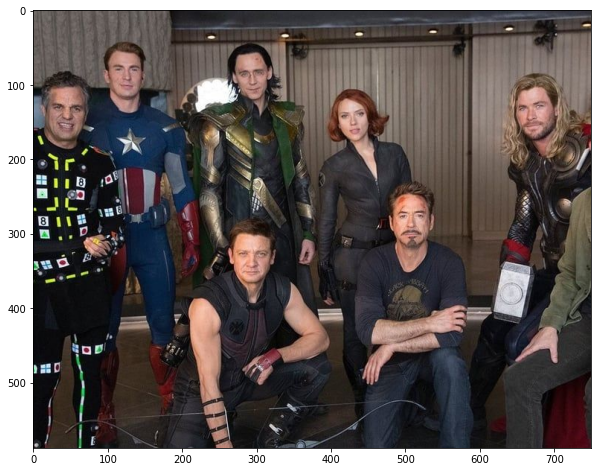

In [20]:
img_with_boxes = functions.draw_boxes(cv2_img, img_regions_list, color=(0,255,255))
plt.figure(figsize=(10,10))
plt.imshow(img_with_boxes[:, :, ::-1])
plt.show()
plt.figure(figsize=(10,10))
plt.imshow(cv2_img[:, :, ::-1])
plt.show()

## tests functions.detect_faces

In [21]:
detected_faces_images, img_regions_list = functions.detect_faces(cv2_img, detector_backend='opencv')

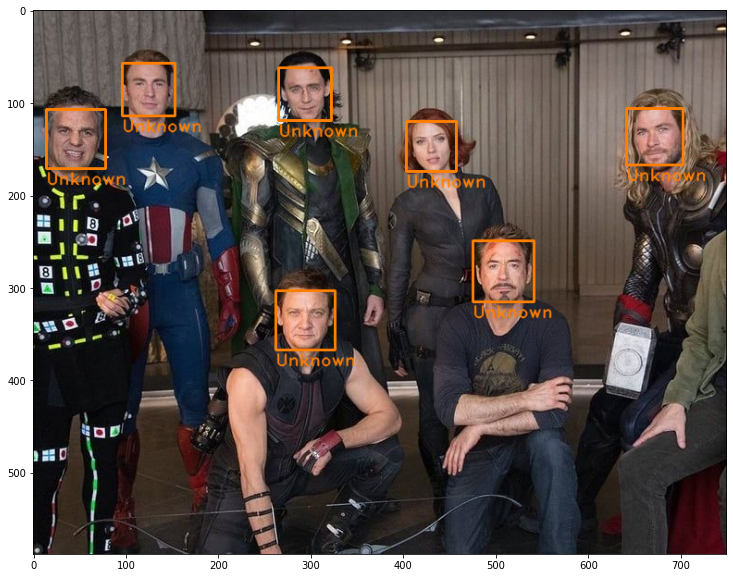

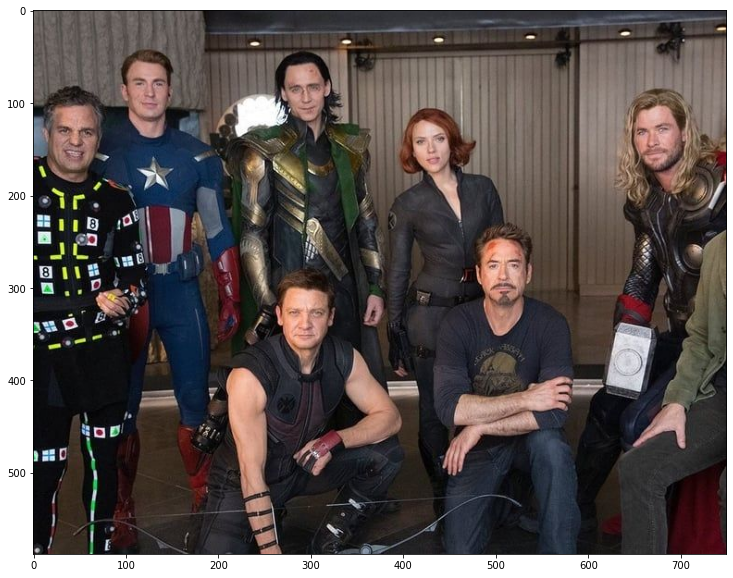

In [22]:
img_with_boxes = functions.draw_boxes(cv2_img, img_regions_list)
plt.figure(figsize=(15,10))
plt.imshow(img_with_boxes[:, :, ::-1])
plt.show()
plt.figure(figsize=(15,10))
plt.imshow(cv2_img[:, :, ::-1])
plt.show()

## tests DeepFace.find_faces

In [104]:
df, cv2_img_boxes = DeepFace.find_faces(img_path="../face_detection/test_images/test2.jpg", db_path="../face_detection/database", detector_backend='dlib')
# df, cv2_img_boxes = DeepFace.find_faces(img_path="../face_detection/test_images/test_chris.jpg", db_path="../face_detection/database", distance_metric="cosine")

Representations stored in ../face_detection/database/representations_vgg_face_dlib.pkl file. Please delete this file when you add new identities in your database.
There are 7 faces found on test2.jpg
find function lasts  3.7960455417633057  seconds


In [105]:
df

box             name  distance  \
0  [268, 314, 51, 52]    Jeremy_Renner  0.022183   
1   [20, 118, 52, 52]              NaN       NaN   
2  [481, 262, 52, 52]              NaN       NaN   
3  [640, 108, 62, 62]  Chris_Hemsworth  0.000848   
4   [271, 74, 43, 44]              NaN       NaN   
5   [101, 61, 51, 52]              NaN       NaN   
6  [410, 127, 43, 43]              NaN       NaN   

                                                   best_match_path  
0  ../face_detection/database/Jeremy_Renner/test_jeremy_renner.jpg  
1                                                              NaN  
2                                                              NaN  
3      ../face_detection/database/Chris_Hemsworth/test_chris_2.jpg  
4                                                              NaN  
5                                                              NaN  
6                                                              NaN

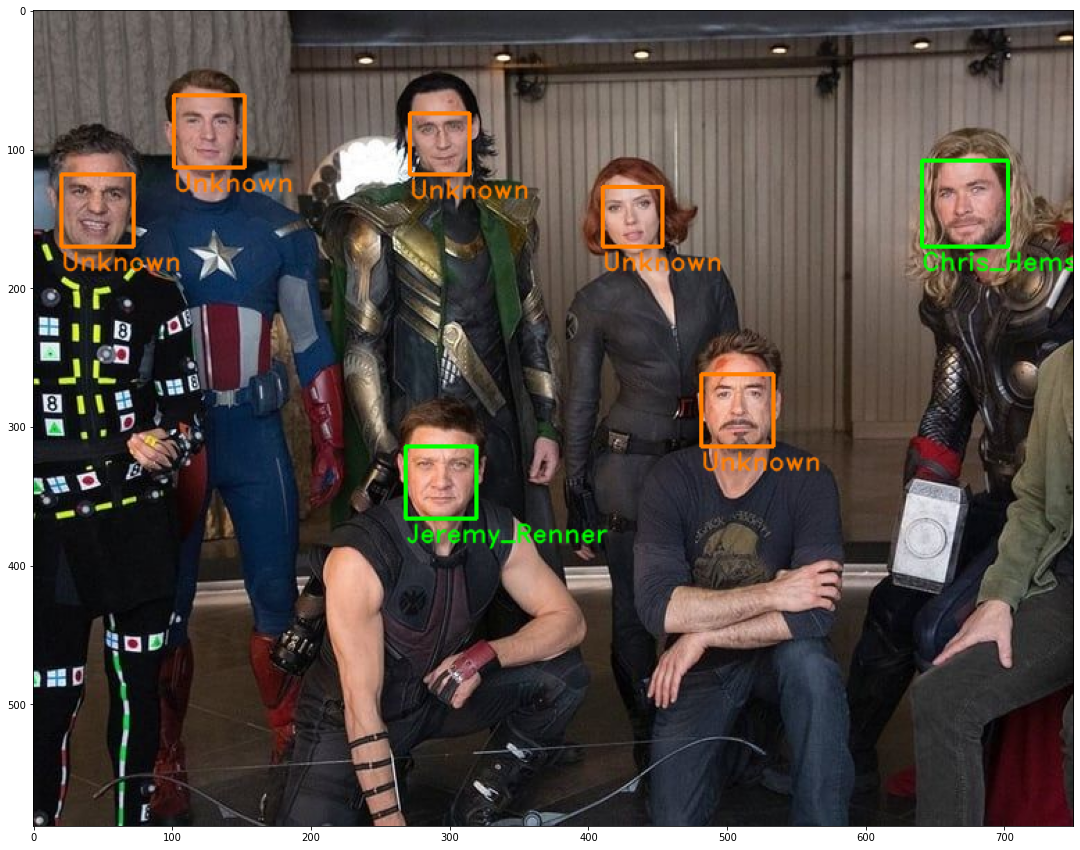

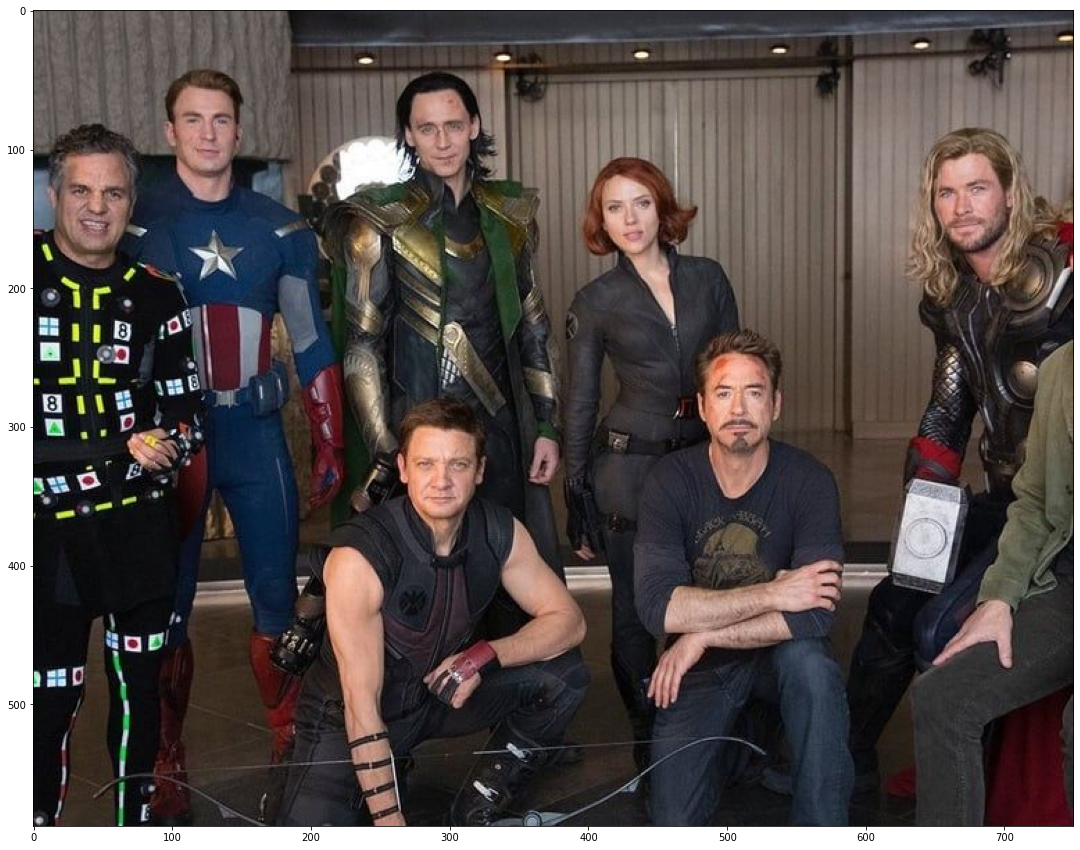

In [106]:
plt.figure(figsize=(20,15))
plt.imshow(cv2_img_boxes[:, :, ::-1])
plt.show()
plt.figure(figsize=(20,15))
plt.imshow(cv2_img[:, :, ::-1])
plt.show()

In [ ]:
df, cv2_img_boxes = DeepFace.find_faces(img_path="../face_detection/test_images/test2.jpg", db_path="../face_detection/database", model_name='DeepFace', detector_backend="opencv")

In [ ]:
df

In [ ]:
plt.figure(figsize=(20,15))
plt.imshow(cv2_img_boxes[:, :, ::-1])
plt.show()
plt.figure(figsize=(20,15))
plt.imshow(cv2_img[:, :, ::-1])
plt.show()

## tests SsdWrapper.detect_faces

In [ ]:
from deepface.detectors import SsdWrapper

In [ ]:
detected_faces_images, img_regions_list = SsdWrapper.detect_faces(SsdWrapper.build_model(), cv2_img, align=True)

In [ ]:
# for image in detected_faces_images:
#     plt.figure(figsize=(5,5))
#     plt.imshow(image[:, :, ::-1])
#     plt.show()

In [ ]:
img_regions_list

In [ ]:
detections_df = SsdWrapper.detect_faces(SsdWrapper.build_model(), flower_img, align=True)

In [ ]:
detections_df

## tests DlibWrapper.detect_faces

In [63]:
from deepface.detectors import DlibWrapper
import dlib

In [67]:
detector = dlib.get_frontal_face_detector()
detector?

Type:           fhog_object_detector
String form:    <_dlib_pybind11.fhog_object_detector object at 0x7f9a055e9e70>
File:           /media/arthur/DATA/Code/projects/16_facial_recognition/venv/lib/python3.9/site-packages/_dlib_pybind11.cpython-39-x86_64-linux-gnu.so
Docstring:      This object represents a sliding window histogram-of-oriented-gradients based object detector.
Init docstring:
__init__(self: _dlib_pybind11.fhog_object_detector, arg0: str) -> None

Loads an object detector from a file that contains the output of the 
train_simple_object_detector() routine or a serialized C++ object of type
object_detector<scan_fhog_pyramid<pyramid_down<6>>>.
Call docstring:
__call__(self: _dlib_pybind11.fhog_object_detector, image: array, upsample_num_times: int=0) -> _dlib_pybind11.rectangles

requires 
    - image is a numpy ndarray containing either an 8bit grayscale or RGB 
      image. 
    - upsample_num_times >= 0 
ensures 
    - This function runs the object detector on the input im

In [93]:
dlib.get_face_chip?

Docstring:
get_face_chip(img: numpy.ndarray[(rows,cols,3),uint8], face: _dlib_pybind11.full_object_detection, size: int=150, padding: float=0.25) -> numpy.ndarray[(rows,cols,3),uint8]

Takes an image and a full_object_detection that references a face in that image and returns the face as a Numpy array representing the image.  The face will be rotated upright and scaled to 150x150 pixels or with the optional specified size and padding.
Type:      builtin_function_or_method


In [102]:
detected_faces_images, img_regions_list = DlibWrapper.detect_faces(DlibWrapper.build_model(), cv2_img, align=True)

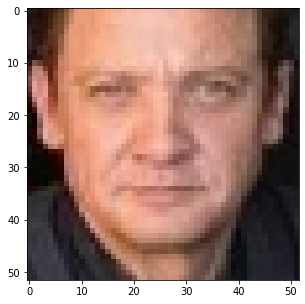

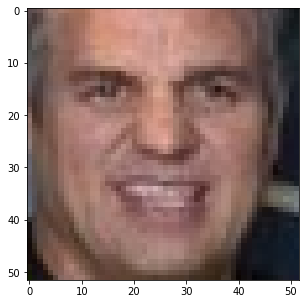

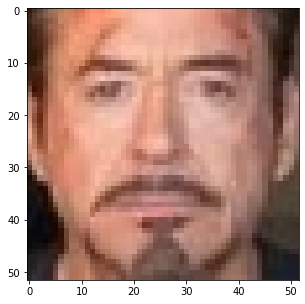

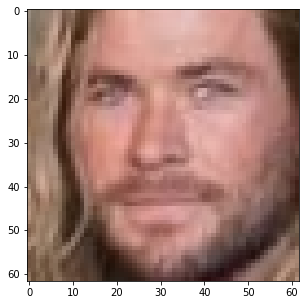

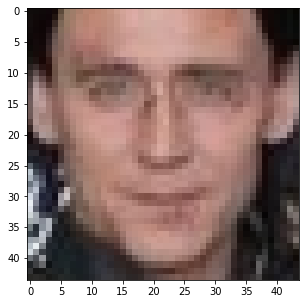

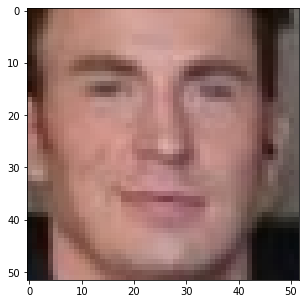

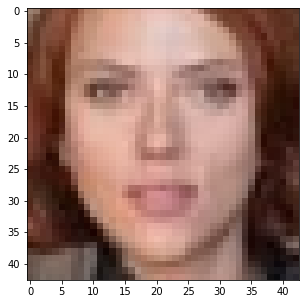

In [103]:
for face_img in detected_faces_images:
    plt.figure(figsize=(5,5))
    plt.imshow(face_img[:, :, ::-1])
    plt.show()

In [99]:
img_regions_list

[[268, 314, 51, 52],
 [20, 118, 52, 52],
 [481, 262, 52, 52],
 [640, 108, 62, 62],
 [271, 74, 43, 44],
 [101, 61, 51, 52],
 [410, 127, 43, 43]]

## tests MtcnnWrapper.detect_faces

In [108]:
from deepface.detectors import MtcnnWrapper

# DUMP

string positional formatting
- string: `%s`
- single character: `%c`
- rounded decimal: `%.2f`
- signed integer: `%i` or `%d`
- convert to hexadecimal: `%04x` lowercase, `%04X` uppercase
- scientific notation: `%.2e` lowercase, `%.2E` uppercase

In [ ]:
"test: %.2e" % 15000

In [49]:
from pathlib import Path
import os

In [46]:
str(Path.home())

'/home/arthur'

In [56]:
r, d, f = next(os.walk(Path.cwd()))
f[0]

'.gitignore'

In [60]:
(Path.cwd() / d[0]).is_dir()

True

In [61]:
(Path.cwd() / f[0]).is_file()

True